### Basic Python Home Work 
<p> Topic  : Titanic
<p> Source : Kaggle.com
<p> Author : Bangun M Sagala
<p> Date   : November 2nd 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('csv/train.csv')
test = pd.read_csv('csv/test.csv')
gender=pd.read_csv('csv/gender_submission.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.shape

(891, 12)

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
count_null =train.isna().sum()
count_null[count_null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
median_age = train['Age'].median(axis=0)
train['Age'] = train['Age'].fillna(median_age)
count_null =train.isna().sum()
count_null[count_null>0]

Cabin       687
Embarked      2
dtype: int64

<p> Age data is fill with median from all value in age column, and we dont use Cabin adan Embarked Data.

In [10]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df2=pd.pivot_table(train,values=['Age'],index=['Survived'],columns=['Sex'],aggfunc='mean')
df2

Age           
Sex          female       male
Survived                      
0         25.666667  30.783120
1         28.716738  27.382294

In [12]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Histogram of total passenger who was survived and not survived
<p> Create variable data for survived and non survived passenger to plot in histogram

In [27]:
train_live=train[train['Survived'] == 1]
train_live.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
train_dead=train[train['Survived'] == 0]
train_dead.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


<p> Histogram of passenger who was survived and not survived

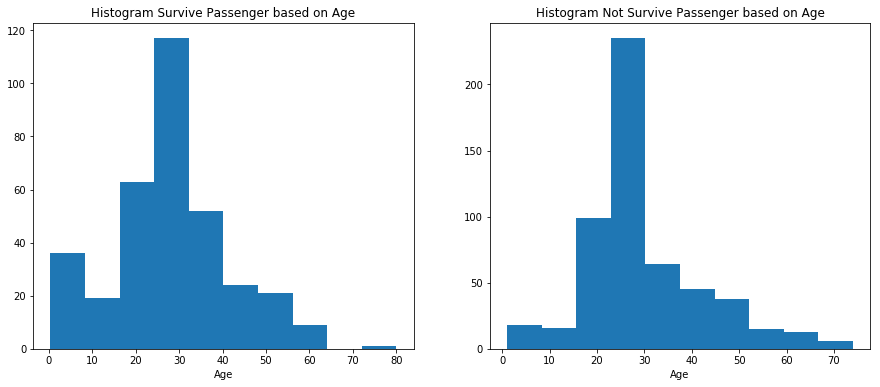

In [32]:
plt.figure(figsize=(15,6))
df_age=['Sex'=='male']

#df[(df.origin == "JFK") & (df.carrier == "B6")]
#train_live=
plt.subplot(1,2,1)
plt.hist(train_live['Age'])
plt.xlabel('Age')
plt.title('Histogram Survive Passenger based on Age')
plt.subplot(1,2,2)
plt.hist(train_dead['Age'])
plt.xlabel('Age')
plt.title('Histogram Not Survive Passenger based on Age')
plt.show()

### Survived vs Passenger Sex 
<p> Create Pivot Table to Count total passenger survived or not based on Passenger Sex

In [44]:
titanic_survived_sex=pd.pivot_table(train,values=['PassengerId'],index=['Sex'],columns=['Survived'],aggfunc='count')

In [51]:
df_sur = pd.DataFrame(titanic_survived_sex.to_records())
df_sur.columns=['Sex','Not Survived','Survived']
df_sur

,Sex,Not Survived,Survived
0,female,81,233
1,male,468,109


In [61]:
labels = df_sur['Sex']
class1 = df_sur['Not Survived']
class2 = df_sur['Survived']
x = np.arange(len(labels))
width = 0.35  # the width of the bars

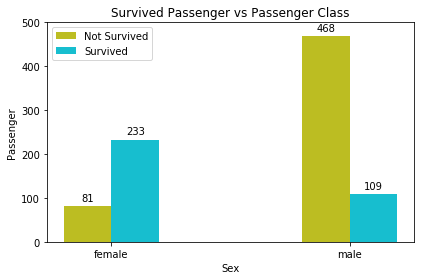

In [70]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, class1, width, label='Not Survived',color='tab:olive')
rects2 = ax.bar(x+width/2, class2, width, label='Survived',color='tab:cyan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Passenger')
ax.set_xlabel('Sex')
ax.set_title('Survived Passenger vs Passenger Class')
ax.set_ylim([0,500])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()


#### Conclusion :
<p>According to the bar chart, where the Female passenger has the higher survive posibility than Male Passenger

## Survived vs Passenger Class
<p>Create Pivot Table to Count total passenger survived or not based on Passenger Class in Titatic

In [33]:
titanic_survived_class=pd.pivot_table(train,values=['PassengerId'],index=['Survived'],columns=['Pclass'],aggfunc='count')
titanic_survived_class_clear = pd.DataFrame(titanic_survived_class.to_records())
titanic_survived_class_clear

,Survived,"('PassengerId', 1)","('PassengerId', 2)","('PassengerId', 3)"
0,0,80,97,372
1,1,136,87,119


<p> Change Column Name

In [34]:
titanic_survived_class_clear.columns=['Survived','PassClass1','PassClass2','PassClass3']
titanic_survived_class_clear

,Survived,PassClass1,PassClass2,PassClass3
0,0,80,97,372
1,1,136,87,119


In [15]:
labels = titanic_survived_class_clear['Survived']
class1 = titanic_survived_class_clear['PassClass1']
class2 = titanic_survived_class_clear['PassClass2']
class3 = titanic_survived_class_clear['PassClass3']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

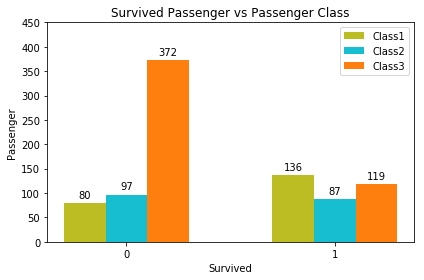

In [29]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-width, class1, width, label='Class1',color='tab:olive')
rects2 = ax.bar(x, class2, width, label='Class2',color='tab:cyan')
rects3 = ax.bar(x+width, class3, width, label='Class3',color='tab:orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Passenger')
ax.set_xlabel('Survived')
ax.set_title('Survived Passenger vs Passenger Class')
ax.set_ylim([0,450])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()


#### Conclusion :
<p>According to the bar chart, passenger with lower class(class3 is lowest class) in Titanic has the lower opportunity to survive, compare to passenger that was not survived in the same class

## Survived vs Passenger Siblings / Spouse
<p>Create Pivot Table to Count total passenger survived or not based on Passenger Connection with other Passenger (spouse or siblings) in Titatic

In [27]:
titanic_survived_con=pd.pivot_table(train,values=['PassengerId'],index=['Survived','Sex'],columns=['SibSp'],aggfunc='count')
titanic_survived_con

PassengerId                                 
SibSp                     0     1     2    3     4    5    8
Survived Sex                                                
0        female        37.0  26.0   3.0  7.0   4.0  1.0  3.0
         male         361.0  71.0  12.0  5.0  11.0  4.0  4.0
1        female       137.0  80.0  10.0  4.0   2.0  NaN  NaN
         male          73.0  32.0   3.0  NaN   1.0  NaN  NaN

In [28]:
titanic_survived_con_clear = pd.DataFrame(titanic_survived_con.to_records())
titanic_survived_con_clear

,Survived,Sex,"('PassengerId', 0)","('PassengerId', 1)","('PassengerId', 2)","('PassengerId', 3)","('PassengerId', 4)","('PassengerId', 5)","('PassengerId', 8)"
0,0,female,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,0,male,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,1,female,137.0,80.0,10.0,4.0,2.0,NaN,NaN
3,1,male,73.0,32.0,3.0,NaN,1.0,NaN,NaN


In [29]:
titanic_survived_con_clear.columns=['Survived','Sex','Alone','1Relatives','2Relatives','3Relatives','4Relatives','5Relatives','8Relatives']
titanic_survived_con_clear

,Survived,Sex,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,0,female,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,0,male,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,1,female,137.0,80.0,10.0,4.0,2.0,NaN,NaN
3,1,male,73.0,32.0,3.0,NaN,1.0,NaN,NaN


In [31]:
titanic_survived_con_clear=titanic_survived_con_clear.fillna(0)
titanic_survived_con_clear
titanic_survived_con_clear.insert(2,'Sex-Survived', titanic_survived_con_clear['Sex'].map(str)+'-'+titanic_survived_con_clear['Survived'].map(str))
titanic_survived_con_clear

,Survived,Sex,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,0,female,female-0,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,0,male,male-0,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,1,female,female-1,137.0,80.0,10.0,4.0,2.0,0.0,0.0
3,1,male,male-1,73.0,32.0,3.0,0.0,1.0,0.0,0.0


In [32]:
titanic_survived_con_clear.drop(columns=['Survived','Sex'],inplace=True)
titanic_survived_con_clear

,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,female-0,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,male-0,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,female-1,137.0,80.0,10.0,4.0,2.0,0.0,0.0
3,male-1,73.0,32.0,3.0,0.0,1.0,0.0,0.0


In [56]:
#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
titanic_survived_con_clear[['Alone','1Relatives','2Relatives','3Relatives','4Relatives','5Relatives','8Relatives']]=titanic_survived_con_clear[['Alone','1Relatives','2Relatives','3Relatives','4Relatives','5Relatives','8Relatives']].astype(int)
titanic_survived_con_clear

,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,female-0,37,26,3,7,4,1,3
1,male-0,361,71,12,5,11,4,4
2,female-1,137,80,10,4,2,0,0
3,male-1,73,32,3,0,1,0,0


In [48]:
titanic_survived_con_clear['Alone'].round(0)

0     37.0
1    361.0
2    137.0
3     73.0
Name: Alone, dtype: float64

In [57]:
titanic_survived_con_clear

,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,female-0,37,26,3,7,4,1,3
1,male-0,361,71,12,5,11,4,4
2,female-1,137,80,10,4,2,0,0
3,male-1,73,32,3,0,1,0,0


In [144]:
labels = titanic_survived_con_clear['Sex-Survived']
class1 = titanic_survived_con_clear['Alone']
class2 = titanic_survived_con_clear['1Relatives']
class3 = titanic_survived_con_clear['2Relatives']
class4 = titanic_survived_con_clear['3Relatives']
class5 = titanic_survived_con_clear['4Relatives']
class6 = titanic_survived_con_clear['5Relatives']
class7 = titanic_survived_con_clear['8Relatives']
x = np.arange(len(labels))
width = 0.1  # the width of the bars

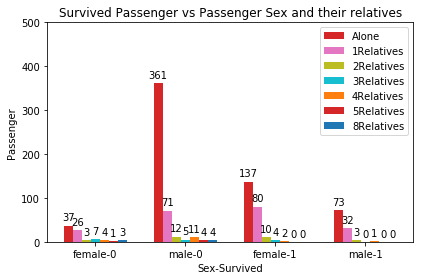

In [145]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-3*width, class1, width, label='Alone',color='tab:red')
rects2 = ax.bar(x-2*width, class2, width, label='1Relatives',color='tab:pink')
rects3 = ax.bar(x-width, class3, width, label='2Relatives',color='tab:olive')
rects4 = ax.bar(x, class4, width, label='3Relatives',color='tab:cyan')
rects5 = ax.bar(x+width, class5, width, label='4Relatives',color='tab:orange')
rects6 = ax.bar(x+2*width, class6, width, label='5Relatives',color='tab:red')
rects7 = ax.bar(x+3*width, class7, width, label='8Relatives',color='tab:blue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Passenger')
ax.set_xlabel('Sex-Survived')
ax.set_title('Survived Passenger vs Passenger Sex and their relatives')
ax.set_ylim([0,500])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
fig.tight_layout()
plt.show()

#### Conclusion :
<p>According to the bar chart, both male and female passenger without Relatives or alone has the highest opportunity to survived, and between them, female passenger has the highest opportunity to survived. Passenger survived opportunity will decreasing in line with the total number of relatives connection with the passenger.    

## Survived vs Passenger Parent / Children
<p>Create Pivot Table to Count total passenger survived or not based on Passenger Connection with other Passenger (Parrent or Children) in Titatic

In [79]:
df3=pd.pivot_table(train,values=['PassengerId'],index=['Survived'],columns=['Parch'],aggfunc='count')
df3_clear = pd.DataFrame(df3.to_records())
df3_clear

,Survived,"('PassengerId', 0)","('PassengerId', 1)","('PassengerId', 2)","('PassengerId', 3)","('PassengerId', 4)","('PassengerId', 5)","('PassengerId', 6)"
0,0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [84]:
df3_clear.columns=['Survived','No Family','Parch1','Parch2','Parch3','Parch4','Parch5','Parch6']
df3_clear=df3_clear.fillna(0)

,Survived,No Family,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6
0,0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,1,233.0,65.0,40.0,3.0,0.0,1.0,0.0


In [85]:
df3_clear[['No Family','Parch1','Parch2','Parch3','Parch4','Parch5','Parch6']]=df3_clear[['No Family','Parch1','Parch2','Parch3','Parch4','Parch5','Parch6']].astype(int)
df3_clear

,Survived,No Family,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6
0,0,445,53,40,2,4,4,1
1,1,233,65,40,3,0,1,0


In [89]:
labels = df3_clear['Survived']
class1 = df3_clear['No Family']
class2 = df3_clear['Parch1']
class3 = df3_clear['Parch2']
class4 = df3_clear['Parch3']
class5 = df3_clear['Parch4']
class6 = df3_clear['Parch5']
class7 = df3_clear['Parch6']
x = np.arange(len(labels))
width = 0.1  # the width of the bars

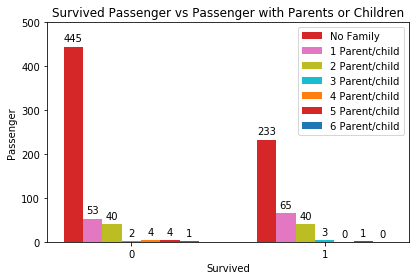

In [123]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-3*width, class1, width, label='No Family',color='tab:red')
rects2 = ax.bar(x-2*width, class2, width, label='1 Parent/child',color='tab:pink')
rects3 = ax.bar(x-width, class3, width, label='2 Parent/child',color='tab:olive')
rects4 = ax.bar(x, class4, width, label='3 Parent/child',color='tab:cyan')
rects5 = ax.bar(x+width, class5, width, label='4 Parent/child',color='tab:orange')
rects6 = ax.bar(x+2*width, class6, width, label='5 Parent/child',color='tab:red')
rects7 = ax.bar(x+3*width, class7, width, label='6 Parent/child',color='tab:blue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Passenger')
ax.set_xlabel('Survived')
ax.set_title('Survived Passenger vs Passenger with Parents or Children')
ax.set_ylim([0,500])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
fig.tight_layout()
plt.show()

#### Conclusion :
<p>According to the bar chart,  passenger who has parent or children in Titanic has lower opportunities to survived than passenger without family in the ship. Passenger survived opportunity will decreasing in line with the total number of parent or children connection with the passenger.

## RESUME :

<p> 1. Age of the passenger which below 30, has the higher opportunity to survive
<p> 2. Female Passenger has the higher opportunity to survived from Titatic
<p> 3. Passenger with the lower class ( class 3 ) in Titatic has the lower opportunity to survive from Titani strategy
<p> 4. Passenger who did not have any relatives in Titatic has the higher opportunity to survive than the passenger who has relatives, more relatives will decrease the opportunity to survive
<p> 5. Passenger without any family (Parent or Children) had the highest opportunity to survived the the ones who had 1 or more.
<p> 6. So for the conclusion the highest opportunity of the passenger to survived from Titatic, He/She is female and his/her age should below 30, occupy highest class (class1), traveled alone without relatives, and does not have parent or children in Titanic.